# The Time-Series Cross-Validation First ProtoType

In [1]:
# Cloud/Local Env Handling
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  PATH = "/content/drive/MyDrive/"  
except:    
  PATH=""

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit

In [4]:
return_data = pd.read_csv(
    PATH + "fx_data/20220929_FX_dataset_daily_raw_targets.csv",
    index_col="Date",
    parse_dates=["Date"]
)

In [5]:
return_data.head()

,symbols,MOM1W,MOM2W,MOM1M,MOM3M,EWVOL3M,SRET1D,SRET3D,SRET1W,SRET2W,...,SORTINO1M,SORTINO3M,SORTINO6M,OMEGA1M,OMEGA3M,OMEGA6M,RAWRET1DAH,RAWISR1M,RAWISR3M,RAWISR6M
Date,,,,,,,,,,,,,,,,,,,,,
2004-05-25,AUD,0.015731,-0.006082,-0.055614,-0.056316,0.122640,0.794805,0.270957,0.910624,-0.248948,...,-0.079603,-0.024478,-6.285969e-03,0.385849,0.720941,0.875331,-0.000117,-0.022878,-0.014408,-0.004832
2004-05-25,CAD,0.000904,-0.007593,-0.034287,0.007412,0.112732,-1.323725,-1.161080,0.056922,-0.338098,...,-0.043225,0.470260,-8.575954e-03,0.629543,1.050538,0.828748,0.000362,-0.012096,0.109706,-0.007627
2004-05-25,CHF,-0.004871,-0.000909,0.007079,0.023576,0.035568,-1.304436,-0.535555,-0.972269,-0.128332,...,4.608029,4.215688,7.449488e-01,1.559042,1.463008,1.085825,0.000065,0.595035,1.174162,0.454858
2004-05-25,DKK,0.000148,0.000134,0.000094,0.001653,0.002823,-0.529057,-0.218269,0.371664,0.238987,...,0.753529,3.150276,-1.595831e-07,1.098828,1.462902,0.995638,0.000108,0.375732,0.999559,0.140704
2004-05-25,GBP,0.013034,0.011086,-0.005693,0.000449,0.087013,0.546624,0.836331,1.063399,0.639579,...,-0.004589,0.085334,1.711806e+00,0.898997,1.010222,1.217466,0.000750,-0.000586,0.045550,0.936243


In [6]:
target = ['RAWISR3M'] # ISharpe Ratio As Target

In [11]:
# Discarding piece of data for pure testing purposes (last complete 3y plus running 2022)
X = return_data[return_data.index<"2019-1-1"].iloc[:,:-4]
y = return_data[return_data.index<"2019-1-1"].loc[:,target]

In [12]:
X.tail()

,symbols,MOM1W,MOM2W,MOM1M,MOM3M,EWVOL3M,SRET1D,SRET3D,SRET1W,SRET2W,...,RACHEV6M99,RACHEV6M95,RACHEV6M90,RACHEV6M80,SORTINO1M,SORTINO3M,SORTINO6M,OMEGA1M,OMEGA3M,OMEGA6M
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,JPY,0.000341,0.015406,0.023311,0.039169,0.068112,0.958100,-0.263260,0.035499,1.135443,...,216.914950,25.910436,9.897034,3.989189,10.573045,4.021342,1.024691,2.186265,1.454315,1.114922
2018-12-31,NOK,0.001247,-0.021955,-0.024044,-0.052596,0.060208,1.442600,0.367086,0.147021,-1.830548,...,21.397244,10.474178,6.250253,3.375089,-0.018078,-0.010236,-0.004653,0.475308,0.505669,0.706600
2018-12-31,NZD,-0.007301,-0.024313,-0.027104,0.028025,0.086974,0.100608,-0.634025,-0.595942,-1.403298,...,369.671432,22.298551,9.786237,4.426369,-0.027664,1.937340,0.399160,0.601019,1.237701,1.047407
2018-12-31,SEK,0.000840,-0.003125,0.005169,0.012791,0.059882,0.691579,0.754762,0.099591,-0.261942,...,58.829053,13.671854,7.324387,3.447077,1.458125,1.384202,-0.000100,1.156082,1.150455,0.993588
2018-12-31,USD,-0.005868,-0.011713,-0.004124,0.009773,0.064648,-0.190858,-0.302625,-0.644430,-0.909517,...,119.368106,30.502123,10.887670,4.227297,-0.001967,0.966508,1.064030,0.884290,1.104506,1.118376


In [13]:
y.tail()

,RAWISR3M
Date,
2018-12-31,1.259654
2018-12-31,-0.005264
2018-12-31,0.787747
2018-12-31,0.805895
2018-12-31,-0.000122


## Tricking `TimeSeriesSplit()` For Rolling Window Scheme with Forward Validation

In [15]:
# Some Experiments with TimeSeriesSplit
instancies_by_date = return_data["symbols"].nunique()
instancies_by_date

10

In [20]:
test_size_ = instancies_by_date*252          # Fixing test_size to 1y each fold (split)
max_train_size_ = instancies_by_date*252*4   # Fixing max_train_size to 4y each fold (split)

tscv = TimeSeriesSplit(
    max_train_size = max_train_size_,
    test_size=test_size_,
    n_splits=11
)

print(tscv)

TimeSeriesSplit(gap=0, max_train_size=10080, n_splits=11, test_size=2520)


In [21]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]

TRAIN: [    0     1     2 ... 10047 10048 10049] TEST: [10050 10051 10052 ... 12567 12568 12569]
TRAIN: [ 2490  2491  2492 ... 12567 12568 12569] TEST: [12570 12571 12572 ... 15087 15088 15089]
TRAIN: [ 5010  5011  5012 ... 15087 15088 15089] TEST: [15090 15091 15092 ... 17607 17608 17609]
TRAIN: [ 7530  7531  7532 ... 17607 17608 17609] TEST: [17610 17611 17612 ... 20127 20128 20129]
TRAIN: [10050 10051 10052 ... 20127 20128 20129] TEST: [20130 20131 20132 ... 22647 22648 22649]
TRAIN: [12570 12571 12572 ... 22647 22648 22649] TEST: [22650 22651 22652 ... 25167 25168 25169]
TRAIN: [15090 15091 15092 ... 25167 25168 25169] TEST: [25170 25171 25172 ... 27687 27688 27689]
TRAIN: [17610 17611 17612 ... 27687 27688 27689] TEST: [27690 27691 27692 ... 30207 30208 30209]
TRAIN: [20130 20131 20132 ... 30207 30208 30209] TEST: [30210 30211 30212 ... 32727 32728 32729]
TRAIN: [22650 22651 22652 ... 32727 32728 32729] TEST: [32730 32731 32732 ... 35247 35248 35249]
TRAIN: [25170 25171 25172 ... 

In [23]:
def plot_cv_indices(cv, X, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=plt.cm.coolwarm,
            vmin=-0.2,
            vmax=1.2,
        )

        # Formatting
    yticklabels = list(range(n_splits))
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 0.2, -0.2],
        xlim=[0, X.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

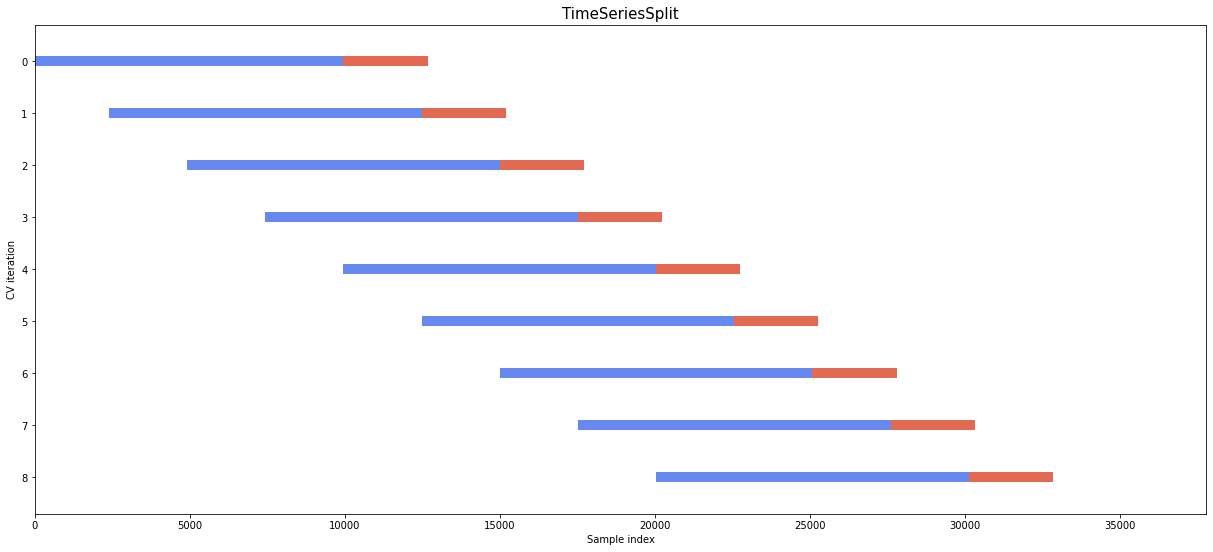

In [24]:
fig, ax = plt.subplots(figsize=(21,9))
plot_cv_indices(tscv, X, ax, 9);